# Programming Exercise 7: K-means Clustering and Principal Component Analysis

## Introduction
In this exercise, you will implement the K-means clustering algorithm and apply it to compress an image. In the second part, you will use principal component analysis to find a low-dimensional representation of face images. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io
import colorsys
import math

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1 K-means Clustering

In this this exercise, you will implement the K-means algorithm and use it for image compression. You will rst start on an example 2D dataset that will help you gain an intuition of how the K-means algorithm works. After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

### 1.1 Implementing K-means
The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set {x(1), ...,  x(m)} (where $x(i) \in \Bbb{R}^n$), and want to group the data into a few cohesive "clusters". The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

The K-means algorithm is as follows:

The inner-loop of the algorithm repeatedly carries out two steps: (i) Assigning each training example $x^{(i)}$ to its closest centroid, and (ii) Recomputing the mean of each centroid using the points assigned to it. The K-means algorithm will always converge to some final set of means for the centroids. Note that the converged solution may not always be ideal and depends on the initial setting of the centroids. Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion). 

You will implement the two phases of the K-means algorithm separately in the next sections.

#### 1.1.1 Finding closest centroids

In the "cluster assignment" phase of the K-means algorithm, the algorithm assigns every training example $x^{(i)}$ to its closest centroid, given the current positions of centroids. Specifically, for every example i we set 

$$ c^{(i)} := j \mbox{  that minimizes  }\|x^{(i)} - \mu_j \|^2, $$

where $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$, and $\mu_j$ is the position (value) of the j'th centroid. Note that $c^{(i)}$ corresponds to idx(i) in the starter code.

Your task is to complete the code in findClosestCentroids. This function takes the data matrix X and the locations of all centroids inside centroids and should output a one-dimensional array idx that holds the index (a value in {1, ...,K}, where K is total number of centroids) of the closest centroid to every training example.

You can implement this using a loop over every training example and every centroid.

Once you have completed the code in findClosestCentroids, the script will run your code and you should see the output [0 2 1] corresponding to the centroid assignments for the first 3 examples.

In [2]:
def findClosestCentroids(X, centroids):
#FINDCLOSESTCENTROIDS computes the centroid memberships for every example
#   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
#   in idx for a dataset X where each row is a single example. idx = m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    idx = np.zeros((X.shape[0], 1))

    dist = np.zeros((X.shape[0], K))

    for i in range(0, K):
        dist[:, i] = np.sum((X - centroids[i,:])**2, axis=1)

    p = np.argmin(dist, axis=1)
    
    return p

In [3]:
# ================= Part 1: Find Closest Centroids ====================
#  To help you implement K-Means, we have divided the learning algorithm 
#  into two functions -- findClosestCentroids and computeCentroids. In this
#  part, you should complete the code in the findClosestCentroids function. 
#
print('Finding closest centroids.\n\n');

# Load an example dataset that we will be using
mat = scipy.io.loadmat('ex7data2.mat')
X = mat['X']

# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(idx[0:3]);
print('\n(the closest centroids should be 0, 2, 1 respectively)\n');

Finding closest centroids.


Closest centroids for the first 3 examples: 

[0 2 1]

(the closest centroids should be 0, 2, 1 respectively)



#### 1.1.2 Computing centroid means
Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specically, for every centroid k we set 

$$
\mu_k := \frac{1}{|C_k|}\sum\limits_{i \in C_k}x^{(i)}
$$


where $C_k$ is the set of examples that are assigned to centroid k. Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid k = 2, then you should update $\mu_2 = \frac{1}{2} (x^{(3)} + x^{(5)})$.

You should now complete the code in computeCentroids. You can implement this function using a loop over the centroids. You can also use a loop over the examples; but if you can use a vectorized implementation that does not use such a loop, your code may run faster.

Once you have completed the code in computeCentroids.m, the script will run your code and output the centroids after the first step of K-means.

In [4]:
def computeCentroids(X, idx, K):
#COMPUTECENTROIDS returns the new centroids by computing the means of the 
#data points assigned to each centroid.
#   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
#   computing the means of the data points assigned to each centroid. It is
#   given a dataset X where each row is a single data point, a vector
#   idx of centroid assignments (i.e. each entry in range [1..K]) for each
#   example, and K, the number of centroids. You should return a matrix
#   centroids, where each row of centroids is the mean of the data points
#   assigned to it.
#

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))

    for i in range(0, K):
        centroids[i, :] = np.mean(X[idx==i, :], axis=0)
        
    return centroids

In [5]:
# ===================== Part 2: Compute Means =========================
#  After implementing the closest centroids function, you should now
#  complete the computeCentroids function.
#
print('\nComputing centroids means.\n\n');

#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K);

print('Centroids computed after initial finding of closest centroids: \n')
print(centroids)
print('\n(the centroids should be\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')



Computing centroids means.


Centroids computed after initial finding of closest centroids: 

[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




## 1.2 K-means on example dataset

After you have completed the two functions (findClosestCentroids and computeCentroids), the next step will run the K-means algorithm on a toy 2D dataset to help you understand how K-means works. Your functions are called from inside the runKmeans script. We encourage you to take a look at the function to understand how it works. Notice that the code calls the two functions you implemented in a loop.

When you run the next step, the K-means code will produce a visualization that steps you through the progress of the algorithm at each iteration. Press enter multiple times to see how each step of the K-means algorithm changes the centroids and cluster assignments. At the end, your figure should look as the one displayed in Figure 1.

In [6]:
def plotDataPoints(X, idx, K):
#PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
#index assignments in idx have the same color
#   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
#   with the same index assignments in idx have the same color

    HSV_tuples = [(x*1.0/K, 1, 1) for x in range(K)]
    palette = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))
    colors = [palette[i] for i in idx]

    # Plot the data
    plt.scatter(X[:,0], X[:,1], c=colors);

In [7]:
def drawLine(p1, p2, *args, **kwargs):
#DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure
    
    #plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'x-', color='k', mew=2)
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], *args, **kwargs)

In [8]:
def plotProgresskMeans(X, centroids, previous, idx, K, i):
#PLOTPROGRESSKMEANS is a helper function that displays the progress of 
#k-Means as it is running. It is intended for use only with 2D data.
#   PLOTPROGRESSKMEANS(X, centroids, previous, idx, K, i) plots the data
#   points with colors assigned to each centroid. With the previous
#   centroids, it also plots a line between the previous locations and
#   current locations of the centroids.
#

    # Plot the examples
    plotDataPoints(X, idx, K)

    # Plot the centroids as black x's
    plt.plot(centroids[:,0], centroids[:,1], 'xk', mew=2)

    # Plot the history of the centroids with lines
    for j in range(0, centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], 'x-', color='k', mew=2);

    # Title
    plt.title('Iteration number %d' % i)

In [9]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
#RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
#is a single example
#   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
#   plot_progress) runs the K-Means algorithm on data matrix X, where each 
#   row of X is a single example. It uses initial_centroids used as the
#   initial centroids. max_iters specifies the total number of interactions 
#   of K-Means to execute. plot_progress is a true/false flag that 
#   indicates if the function should also plot its progress as the 
#   learning happens. This is set to false by default. runkMeans returns 
#   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
#   vector of centroid assignments (i.e. each entry in range [1..K])
#

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    # Run K-Means
    for i in range(0, max_iters):
        # Output progress
        print('K-Means iteration %d/%d...\n' % (i, max_iters))

        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)

        # Optionally, plot progress here
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids;

        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)

    return centroids, idx


Running K-Means clustering on example dataset.


K-Means iteration 0/10...

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...


K-Means Done.




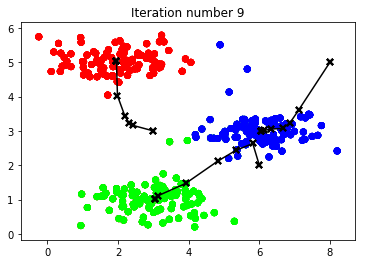

In [10]:
# =================== Part 3: K-Means Clustering ======================
#  After you have completed the two functions computeCentroids and
#  findClosestCentroids, you have all the necessary pieces to run the
#  kMeans algorithm. In this part, you will run the K-Means algorithm on
#  the example dataset we have provided. 
#
print('\nRunning K-Means clustering on example dataset.\n\n');

# Load an example dataset
mat = scipy.io.loadmat('ex7data2.mat')
X = mat['X']

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print('\nK-Means Done.\n\n');

## 1.3 Random initialization
The initial assignments of centroids for the example dataset were designed so that you will see the same figure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the training set. In this part of the exercise, you should complete the function kMeansInitCentroids.m
with the following code:
    
The code above first randomly permutes the indices of the examples (using randperm). Then, it selects the first K examples based on the random permutation of the indices. This allows the examples to be selected at random without the risk of selecting the same example twice.

In [11]:
def kMeansInitCentroids(X, K):
#KMEANSINITCENTROIDS This function initializes K centroids that are to be 
#used in K-Means on the dataset X
#   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
#   used with the K-Means on the dataset X
#

    # You should return this values correctly
    ind = np.random.permutation(X.shape[0])
    
    return X[ind[:K], :]

## 1.4 Image compression with K-means

In this exercise, you will apply K-means to image compression. In a straightforward 24-bit color representation of an image,2 each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding. Our image contains thousands of colors, and in this  part of the exercise, you will reduce the number of colors to 16 colors. 

By making this reduction, it is possible to represent (compress) the photo in an effcient way. Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once you have computed the cluster centroids on 
the image, you will then use the 16 colors to replace the pixels in the original image.

### 1.4.1 K-means on pixels
Reading an image creates a three-dimensional matrix A whose first two indices identify a pixel position and whose last index represents red, green, or blue. For example, A(50, 33, 3) gives the blue intensity of the pixel at row 50 and column 33.

The code inside ex7.m first loads the image, and then reshapes it to create an $m \times 3$ matrix of pixel colors (where m = $16384 = 128 \times 128$), and calls your K-means function on it. After finding the top K = 16 colors to represent the image, you can now assign each pixel position to its closest centroid using the findClosestCentroids function. This allows you to represent the original image using the centroid assignments of each pixel. Notice that you have significantly reduced the number of bits that are required to describe the image. The original image required 24 bits for each one of the $128 \times 128$ pixel locations, resulting in total size of $128 \times 128\times 24 = 393,216$ bits. The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location. The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

Finally, you can view the effects of the compression by reconstructing the image based only on the centroid assignments. Specifically, you can replace each pixel location with the mean of the centroid assigned to it. Figure 3 shows the reconstruction we obtained. Even though the resulting image retains most of the characteristics of the original, we also see some compression
artifacts.

In [12]:
# ============= Part 4: K-Means Clustering on Pixels ===============
#  In this exercise, you will use K-Means to compress an image. To do this,
#  you will first run K-Means on the colors of the pixels in the image and
#  then you will map each pixel onto its closest centroid.
#  
#  You should now complete the code in kMeansInitCentroids.m
#

print('\nRunning K-Means clustering on pixels from an image.\n\n');

#  Load an image of a bird
#A = double(imread('bird_small.png'));

# If imread does not work for you, you can try instead
mat = scipy.io.loadmat('bird_small.mat')
A = mat['A']

A = A / 255 # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = np.reshape(A, (img_size[0] * img_size[1], 3))

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)


Running K-Means clustering on pixels from an image.


K-Means iteration 0/10...

K-Means iteration 1/10...

K-Means iteration 2/10...

K-Means iteration 3/10...

K-Means iteration 4/10...

K-Means iteration 5/10...

K-Means iteration 6/10...

K-Means iteration 7/10...

K-Means iteration 8/10...

K-Means iteration 9/10...




Applying K-Means to compress an image.




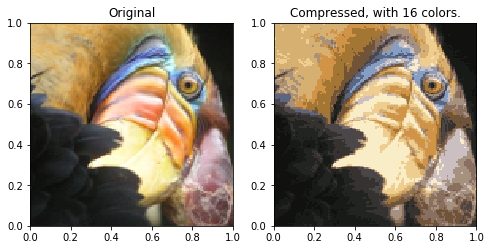

In [13]:
# ================= Part 5: Image Compression ======================
#  In this part of the exercise, you will use the clusters of K-Means to
#  compress an image. To do this, we first find the closest clusters for
#  each example. After that, we 

print('\nApplying K-Means to compress an image.\n\n')

# Find closest cluster members
idx = findClosestCentroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
X_recovered = centroids[idx,:]

# Reshape the recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, (img_size[0], img_size[1], 3))

fig = plt.figure(figsize=(8,4))

# Display the original image 
ax1 = fig.add_subplot(121)
ax1.imshow(A, extent=[0, 1, 0, 1])
ax1.set_title('Original')

# Display compressed image side by side
ax2 = fig.add_subplot(122)
ax2.imshow(X_recovered, extent=[0, 1, 0, 1])
ax2.set_title('Compressed, with %d colors.' % K)

## 1.5 Optional (ungraded) exercise: Use your own image
In this exercise, modify the code we have supplied to run on one of your own images. Note that if your image is very large, then K-means can take a long time to run. Therefore, we recommend that you resize your images to managable sizes before running the code. You can also try to vary K to see the effects on the compression.